In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC

In [2]:
df_diabetics=pd.read_csv("D:\svm\diabetes2.csv")

In [3]:
df_diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetics.shape

(768, 9)

Text(0.5, 1.0, 'correlation')

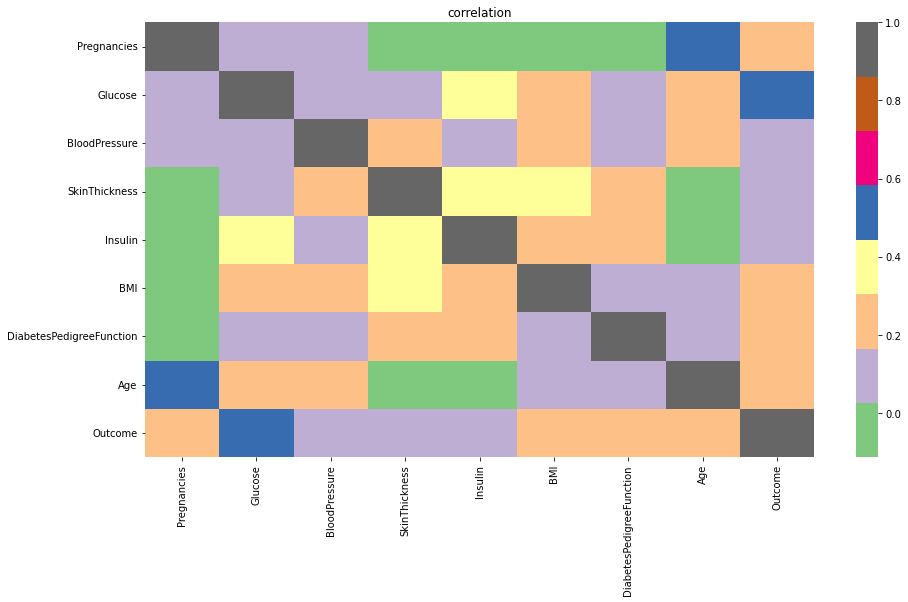

In [5]:
corr=df_diabetics.corr()
fig=plt.figure(figsize=(15,8))
r=sns.heatmap(corr, cmap="Accent")
r.set_title("correlation")

In [6]:
corr.sort_values(by=['Age'], ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752


In [7]:
df_diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#check for any null values or not
print(pd.isnull(df_diabetics).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\chetan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


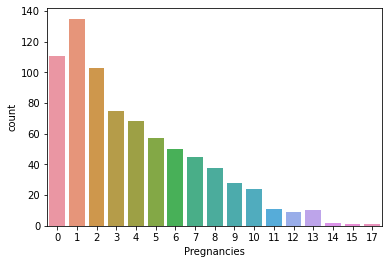

In [9]:
sns.countplot(df_diabetics['Pregnancies'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

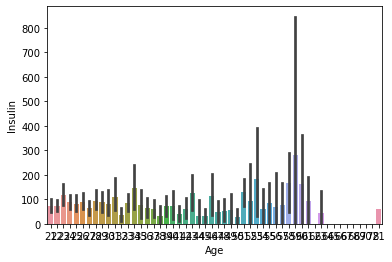

In [10]:
sns.barplot(x='Age',y='Insulin',data=df_diabetics)

In [11]:
df_diabetics['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [12]:
df_diabetics['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

C:\Users\chetan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

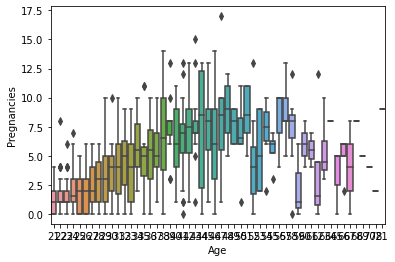

In [13]:
sns.boxplot(df_diabetics['Age'], df_diabetics['Pregnancies'])

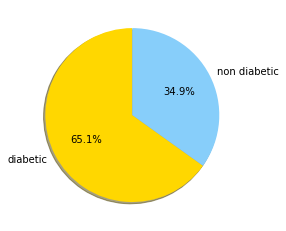

In [14]:
# pie plot for dibetic patient
labels=['diabetic','non diabetic']
values=df_diabetics['Outcome'].value_counts().values
fig, ax1=plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'content')

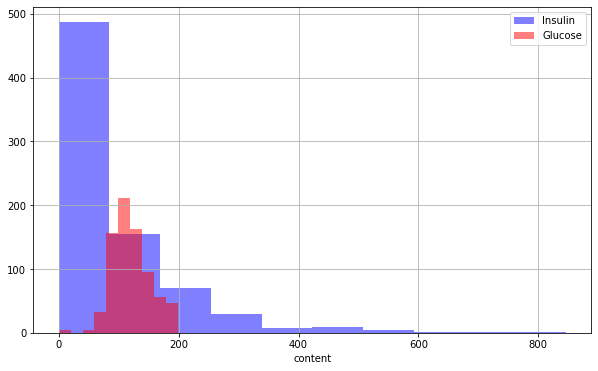

In [15]:
plt.figure(figsize=(10,6))
df_diabetics['Insulin'].hist(alpha=0.5,color='blue',label='Insulin')
df_diabetics['Glucose'].hist(alpha=0.5,color='red',label='Glucose')
plt.legend()
plt.xlabel('content')

In [19]:
scaler = StandardScaler()
x=df_diabetics.drop('Outcome',axis=1)
y=df_diabetics['Outcome']



In [27]:
prediction=model.predict(x_test)
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
302,5,77,82,41,42,35.8,0.156,35
131,9,122,56,0,0,33.3,1.114,33
124,0,113,76,0,0,33.3,0.278,23
486,1,139,62,41,480,40.7,0.536,21
306,10,161,68,23,132,25.5,0.326,47


In [24]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [25]:
#Builiding support vector machine

model = SVC() 
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
# predicted valuse of the model 

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))


Train Set Accuracy:78.17589576547232
Test Set Accuracy:78.57142857142857

Confusion Matrix:
[[94 25]
 [ 8 27]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       119
           1       0.52      0.77      0.62        35

    accuracy                           0.79       154
   macro avg       0.72      0.78      0.74       154
weighted avg       0.83      0.79      0.80       154

